In [1]:
import pandas as pd

from pycaret.classification import *

from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('Credit-Scoring-Clean.csv')

In [3]:
df

,CheckingAcctStat,Duration,CreditHistory,Purpose,CreditAmount,Savings,Employment,InstallmentRatePecnt,SexAndStatus,OtherDetorsGuarantors,...,Property,Age,OtherInstalments,Housing,ExistingCreditsAtBank,Job,NumberDependents,Telephone,ForeignWorker,CreditStatus
0,A11,0.205882,A32,A43,0.161770,A61,A73,0.333333,A92,A101,...,A121,0.089286,A143,A152,0.000000,A173,0.0,A191,A201,1
1,A14,0.294118,A32,A43,0.058380,A62,A74,1.000000,A94,A101,...,A122,0.125000,A143,A152,0.000000,A173,0.0,A192,A201,0
2,A14,0.205882,A32,A43,0.069055,A61,A73,1.000000,A93,A101,...,A124,0.232143,A143,A153,0.000000,A174,0.0,A192,A201,0
3,A11,0.647059,A32,A43,0.358094,A61,A73,0.666667,A92,A101,...,A123,0.214286,A143,A152,0.000000,A173,0.0,A192,A201,1
4,A13,0.029412,A33,A43,0.023825,A61,A72,0.333333,A92,A101,...,A122,0.178571,A141,A152,0.000000,A173,0.0,A191,A201,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,A12,0.341710,A32,A45,0.154877,A61,A73,1.000000,A94,A101,...,A123,0.191593,A143,A152,0.000000,A173,0.0,A191,A201,1
946,A11,0.175015,A31,A43,0.134978,A61,A73,1.000000,A91,A101,...,A123,0.717821,A143,A153,0.247931,A173,0.0,A191,A201,1
947,A11,0.173663,A34,A43,0.121347,A61,A73,1.000000,A92,A101,...,A124,0.222093,A143,A153,0.000000,A173,0.0,A191,A201,1
948,A11,0.060279,A32,A44,0.045761,A62,A72,1.000000,A92,A101,...,A122,0.068551,A143,A152,0.000000,A173,0.0,A191,A201,1


In [4]:
df.shape

(950, 21)

In [5]:
df.describe()

,Duration,CreditAmount,InstallmentRatePecnt,PresentResidenceTime,Age,ExistingCreditsAtBank,NumberDependents,CreditStatus
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000
mean,0.263065,0.170909,0.677493,0.622210,0.281522,0.120408,0.168831,0.552632
std,0.171636,0.149191,0.360865,0.358755,0.192646,0.172864,0.370883,0.497484
min,0.000000,0.001431,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.117647,0.063684,0.333333,0.333333,0.126539,0.000000,0.000000,0.000000
50%,0.232383,0.125665,0.810761,0.666667,0.232143,0.000000,0.000000,1.000000
75%,0.352941,0.226759,1.000000,1.000000,0.392857,0.333333,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,0.982143,1.000000,1.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CheckingAcctStat       950 non-null    object 
 1   Duration               950 non-null    float64
 2   CreditHistory          950 non-null    object 
 3   Purpose                950 non-null    object 
 4   CreditAmount           950 non-null    float64
 5   Savings                950 non-null    object 
 6   Employment             950 non-null    object 
 7   InstallmentRatePecnt   950 non-null    float64
 8   SexAndStatus           950 non-null    object 
 9   OtherDetorsGuarantors  950 non-null    object 
 10  PresentResidenceTime   950 non-null    float64
 11  Property               950 non-null    object 
 12  Age                    950 non-null    float64
 13  OtherInstalments       950 non-null    object 
 14  Housing                950 non-null    object 
 15  Existi

### Drop Housing column

In [7]:
df1 = df.drop(['Housing','SexAndStatus','OtherDetorsGuarantors','OtherInstalments','ExistingCreditsAtBank',
              'CreditAmount','Job','NumberDependents','ForeignWorker'],axis=1)

In [8]:
df1

,CheckingAcctStat,Duration,CreditHistory,Purpose,Savings,Employment,InstallmentRatePecnt,PresentResidenceTime,Property,Age,Telephone,CreditStatus
0,A11,0.205882,A32,A43,A61,A73,0.333333,0.333333,A121,0.089286,A191,1
1,A14,0.294118,A32,A43,A62,A74,1.000000,0.666667,A122,0.125000,A192,0
2,A14,0.205882,A32,A43,A61,A73,1.000000,0.333333,A124,0.232143,A192,0
3,A11,0.647059,A32,A43,A61,A73,0.666667,0.333333,A123,0.214286,A192,1
4,A13,0.029412,A33,A43,A61,A72,0.333333,0.000000,A122,0.178571,A191,0
...,...,...,...,...,...,...,...,...,...,...,...,...
945,A12,0.341710,A32,A45,A61,A73,1.000000,0.333333,A123,0.191593,A191,1
946,A11,0.175015,A31,A43,A61,A73,1.000000,0.179146,A123,0.717821,A191,1
947,A11,0.173663,A34,A43,A61,A73,1.000000,0.093443,A124,0.222093,A191,1
948,A11,0.060279,A32,A44,A62,A72,1.000000,0.487520,A122,0.068551,A191,1


In [9]:
df1.describe()

,Duration,InstallmentRatePecnt,PresentResidenceTime,Age,CreditStatus
count,950.000000,950.000000,950.000000,950.000000,950.000000
mean,0.263065,0.677493,0.622210,0.281522,0.552632
std,0.171636,0.360865,0.358755,0.192646,0.497484
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.117647,0.333333,0.333333,0.126539,0.000000
50%,0.232383,0.810761,0.666667,0.232143,1.000000
75%,0.352941,1.000000,1.000000,0.392857,1.000000
max,1.000000,1.000000,1.000000,0.982143,1.000000


### Setup the Experiment

In [10]:
exp = setup(data=df1, target= 'CreditStatus', session_id=0, train_size=0.7, normalize=False)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,0
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(950, 12)"
4,Missing Values,False
5,Numeric Features,4
6,Categorical Features,7
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [11]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,CatBoost Classifier,0.820700,0.907300,0.871800,0.819000,0.842300,0.634600
1,Light Gradient Boosting Machine,0.805600,0.892800,0.831000,0.821500,0.824600,0.606500
2,Extra Trees Classifier,0.801200,0.886400,0.874500,0.792200,0.829500,0.592300
3,Random Forest Classifier,0.793700,0.861000,0.809400,0.818100,0.812900,0.582700
4,Gradient Boosting Classifier,0.792100,0.880900,0.822800,0.807500,0.813200,0.578800
5,Extreme Gradient Boosting,0.781600,0.880400,0.825700,0.792500,0.805900,0.556100
6,Ada Boost Classifier,0.768100,0.857400,0.792900,0.790900,0.790400,0.530800
7,Linear Discriminant Analysis,0.737900,0.810400,0.800800,0.745300,0.770400,0.465100
8,Ridge Classifier,0.734900,0.000000,0.803600,0.740300,0.769000,0.458400
9,K Neighbors Classifier,0.728900,0.781700,0.847400,0.717000,0.775900,0.439100


### Random Forest Classifier Model

In [12]:
rfmodel = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8209,0.8523,0.8378,0.8378,0.8378,0.6378
1,0.8060,0.8514,0.7838,0.8529,0.8169,0.6113
2,0.7612,0.8441,0.7568,0.8000,0.7778,0.5201
3,0.7910,0.8414,0.7838,0.8286,0.8056,0.5801
4,0.7273,0.8341,0.8108,0.7317,0.7692,0.4380
5,0.8485,0.8938,0.8378,0.8857,0.8611,0.6947
6,0.8182,0.8719,0.8108,0.8571,0.8333,0.6337
7,0.8030,0.8620,0.8056,0.8286,0.8169,0.6039
8,0.7727,0.8778,0.8333,0.7692,0.8000,0.5378
9,0.7879,0.8815,0.8333,0.7895,0.8108,0.5698


In [13]:
print(rfmodel)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


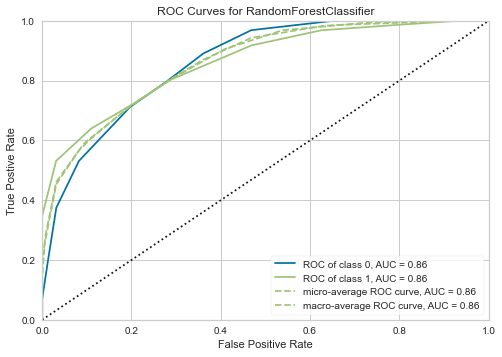

In [14]:
plot_model(rfmodel)

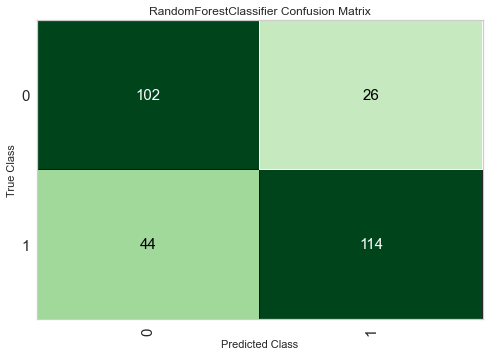

In [15]:
plot_model(rfmodel, plot = 'confusion_matrix')

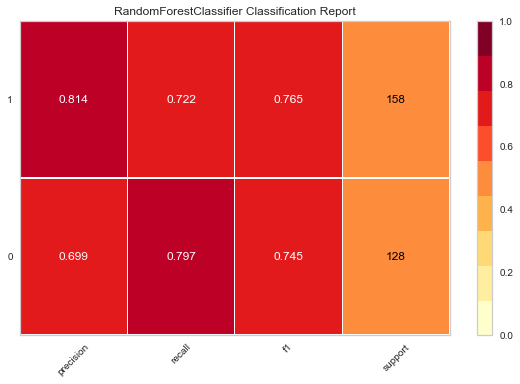

In [16]:
plot_model(rfmodel, plot = 'class_report')

In [17]:
evaluate_model(rfmodel)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### Hyperparameter Tuning

In [18]:
bagged_rf = ensemble_model(rfmodel)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8657,0.9158,0.8919,0.8684,0.8800,0.7275
1,0.7761,0.8604,0.8649,0.7619,0.8101,0.5400
2,0.8209,0.8901,0.8108,0.8571,0.8333,0.6401
3,0.7612,0.8905,0.9459,0.7143,0.8140,0.4981
4,0.7576,0.8779,0.8919,0.7333,0.8049,0.4928
5,0.8939,0.9082,0.9189,0.8947,0.9067,0.7839
6,0.8636,0.9203,0.8378,0.9118,0.8732,0.7263
7,0.7727,0.8449,0.7778,0.8000,0.7887,0.5429
8,0.8030,0.8764,0.8611,0.7949,0.8267,0.5994
9,0.8030,0.9144,0.9167,0.7674,0.8354,0.5949


In [19]:
print(bagged_rf)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True,
                                                        ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features='auto',
                                                        max_leaf_nodes=None,
                                                        max_samples=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
     

### Model Plot

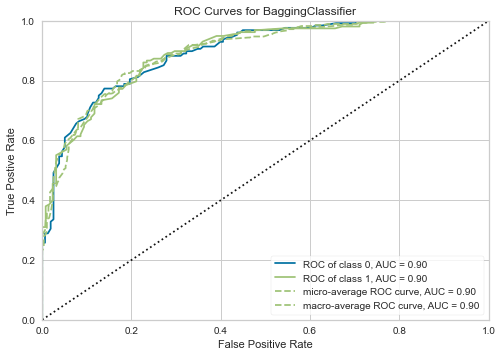

In [20]:
plot_model(bagged_rf)

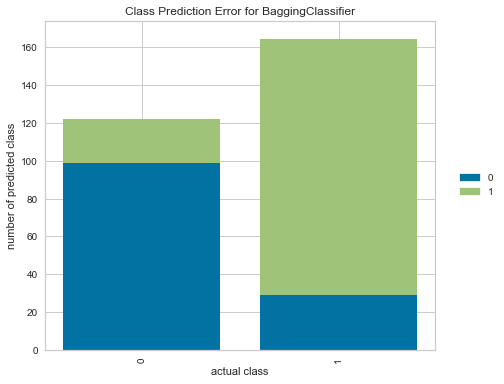

In [21]:
plot_model(bagged_rf, plot = 'error')

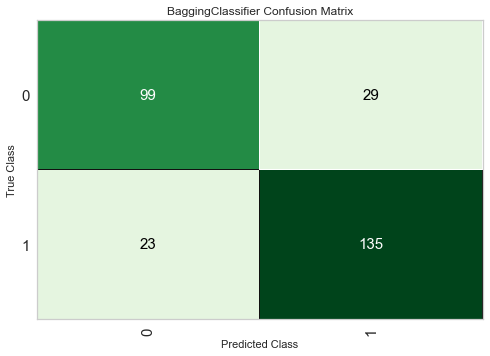

In [22]:
plot_model(bagged_rf, plot='confusion_matrix')

### Model Evaluation

In [23]:
evaluate_model(bagged_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### Model Prediction

In [24]:
predict_model(bagged_rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Bagging Classifier,0.8182,0.896,0.8544,0.8232,0.8385,0.6307


,Duration,InstallmentRatePecnt,PresentResidenceTime,Age,CheckingAcctStat_A11,CheckingAcctStat_A12,CheckingAcctStat_A13,CheckingAcctStat_A14,CreditHistory_A30,CreditHistory_A31,...,Employment_A74,Employment_A75,Property_A121,Property_A122,Property_A123,Property_A124,Telephone_A192,CreditStatus,Label,Score
0,0.073529,0.333333,1.000000,0.571429,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,0,0.33
1,0.205882,1.000000,0.666667,0.303571,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.34
2,0.029412,0.666667,0.333333,0.571429,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.23
3,0.221316,0.613880,0.333333,0.092164,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,1,0.89
4,0.250000,1.000000,1.000000,0.821429,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0,1,0.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,0.197459,1.000000,1.000000,0.072638,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,0.89
282,0.470588,0.333333,1.000000,0.410714,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,1,0.78
283,0.294118,0.333333,0.333333,0.142857,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1,0.68
284,0.294118,0.333333,0.666667,0.214286,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1,1,0.69


### Saving the model

In [25]:
#save_model()